In [14]:
from skimage.feature import hog
import skimage.io as io
import skimage.color as cl
import os as os 
import matplotlib.pyplot as plt
import skimage.filters as filt 
import skimage.exposure as exp
import skimage.morphology as morph
import numpy as np
import skimage.segmentation as seg
import skimage.feature as ft
from scipy.ndimage.morphology import distance_transform_edt 

# HoG Helper Function

In [25]:
plt.rcParams['image.cmap'] = 'gray'

def apply_watershed(image):
    
    image = cl.rgb2gray(image.copy())
    image = filt.unsharp_mask(image, radius=1, amount=4)
    image = exp.equalize_hist(image,nbins=256)
    image = morph.opening(image,selem=morph.square(3))
    
    seeds = np.zeros_like(image,dtype=np.uint)
    thresh = filt.threshold_otsu(image)
    seeds[image>thresh]=1
    seeds[image<=0.2]=2
    labels = seg.random_walker(image,seeds,beta=10)
    
    
    segmented_image = np.zeros((image.shape[0],image.shape[1]),dtype=bool)
    for i in range(0,labels.shape[0]):
        for j in range(0,labels.shape[1]):
            if(labels[i][j]==1):
                segmented_image[i][j]=True

    
    image_size = segmented_image.shape[0]* segmented_image.shape[1]    
    segmented_image = morph.binary_opening(segmented_image,selem = morph.square(5))
    segmented_image = morph.remove_small_objects(segmented_image,min_size=image_size/256)
    segmented_image = morph.remove_small_holes(segmented_image,min_size=64)
    
    
    superimposed_image = seg.mark_boundaries(image,segmented_image,color=(1,0,0),outline_color=(1,0,0)) 
    plt.figure()
    plt.title("Before")
    plt.imshow(superimposed_image)
    plt.show()

    dt = distance_transform_edt(segmented_image)
    minima = ft.peak_local_max(dt,indices=False,min_distance=6)
    ws = seg.watershed(-dt,morph.label(minima),watershed_line=True)
    segmented_image[ws==0]=False   
    
    superimposed_image = seg.mark_boundaries(image,segmented_image,color=(1,0,0),outline_color=(1,0,0)) 
    plt.figure()
    plt.title("After")
    plt.imshow(superimposed_image)
    plt.show()
    
    return segmented_image


# Training and Testing HoG

Processed Image: G0166380.JPG Class: 1


D:\Anaconda_Installed\lib\site-packages\skimage\morphology\misc.py:212: UserWarning: the min_size argument is deprecated and will be removed in 0.16. Use area_threshold instead.
  "0.16. Use area_threshold instead.")


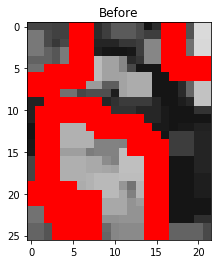

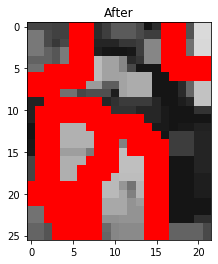

Processed Image: G0166381.JPG Class: 1


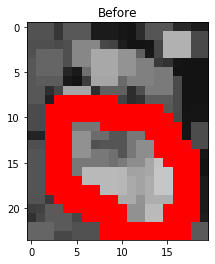

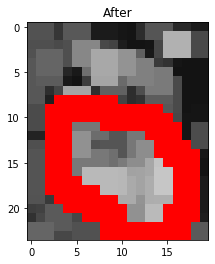

Processed Image: G0166382.JPG Class: 1


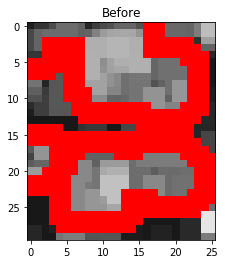

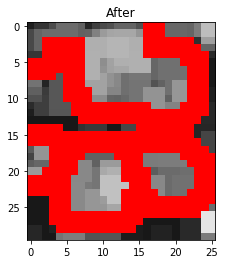

Processed Image: G0166383.JPG Class: 1


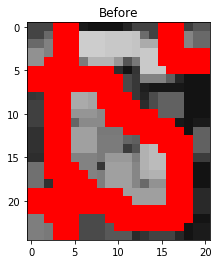

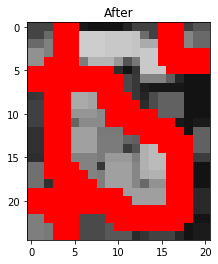

Processed Image: G0166384.JPG Class: 1


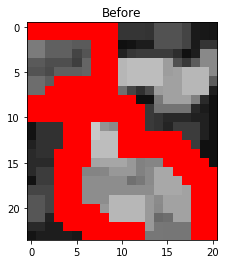

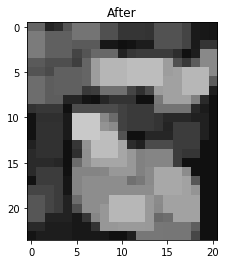

Processed Image: G0296469.JPG Class: 1


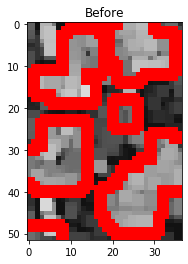

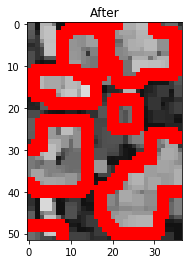

Processed Image: G0296472.JPG Class: 1


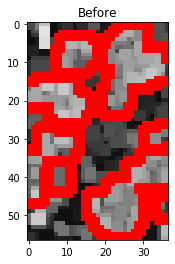

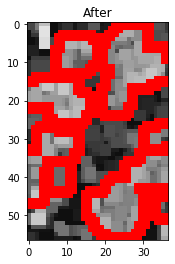

Processed Image: G0296473.JPG Class: 1


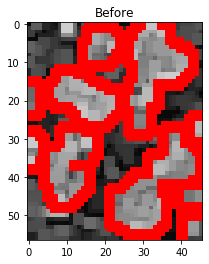

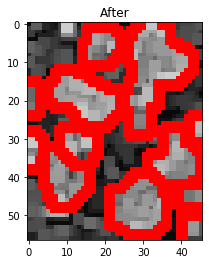

Processed Image: G0296474.JPG Class: 1


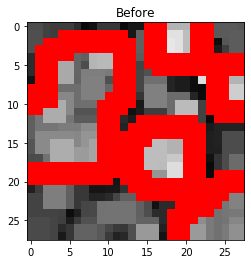

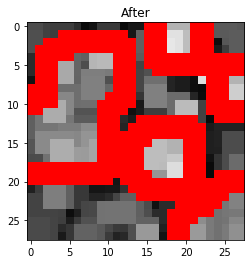

Processed Image: G0296476.JPG Class: 1


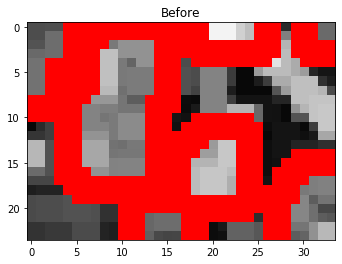

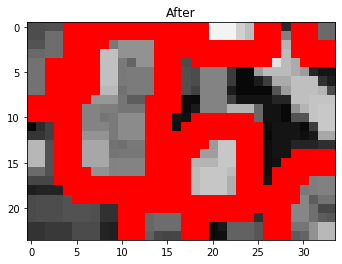

Processed Image: G0296477.JPG Class: 1


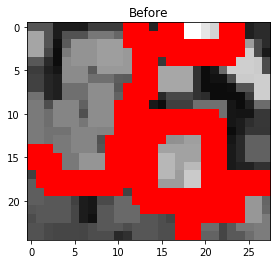

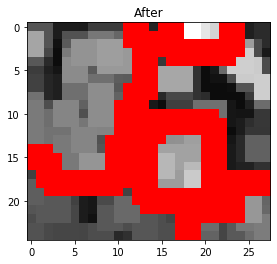

Processed Image: G0296478.JPG Class: 1


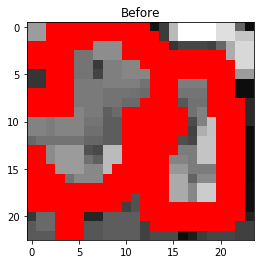

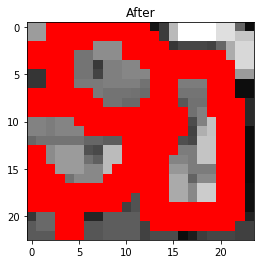

Processed Image: G0296481.JPG Class: 1


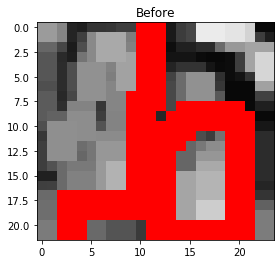

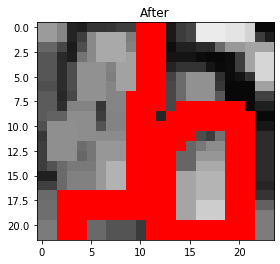

Processed Image: G0306486.JPG Class: 1


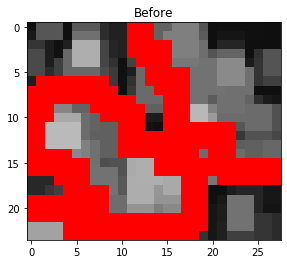

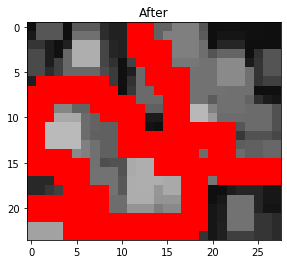

Processed Image: G0306487.JPG Class: 1


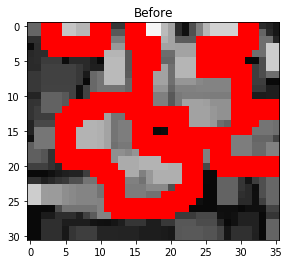

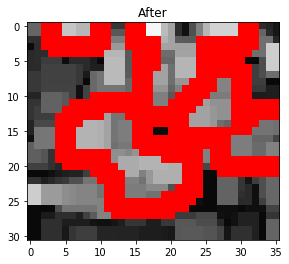

Processed Image: G0306493.JPG Class: 1


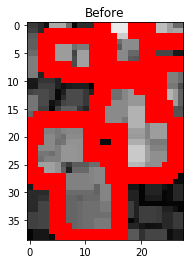

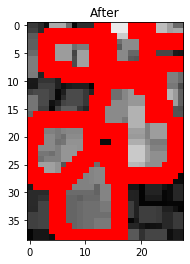

Processed Image: G0306495.JPG Class: 1


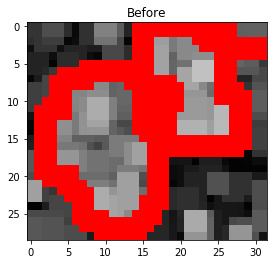

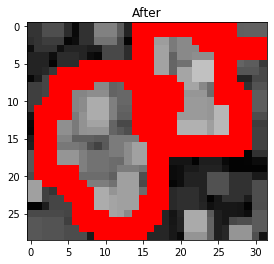

Processed Image: G0346562.JPG Class: 1


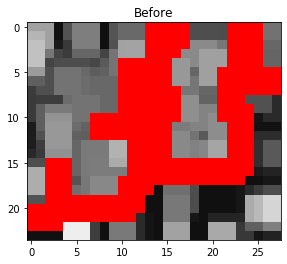

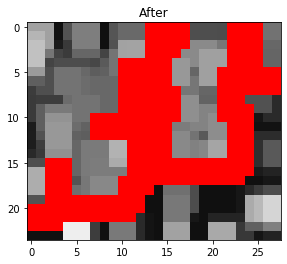

Processed Image: G0346563.JPG Class: 1


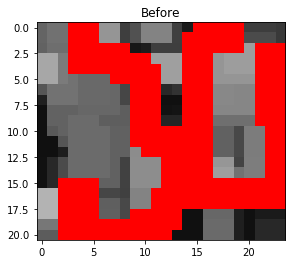

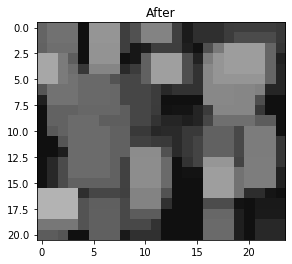

Processed Image: G0346565.JPG Class: 1


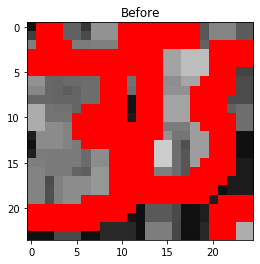

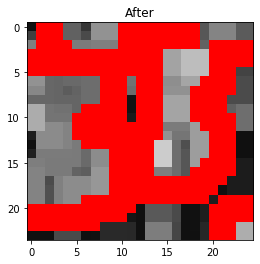

Processed Image: IMG_4444.JPG Class: 10


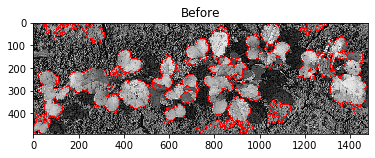

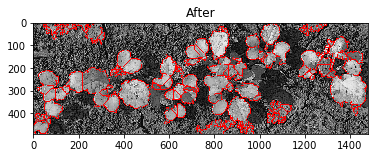

Processed Image: IMG_4480.JPG Class: 10


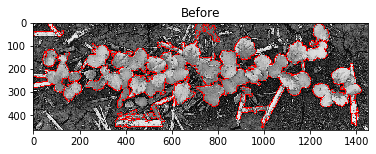

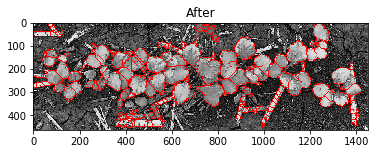

Processed Image: IMG_4488.JPG Class: 10


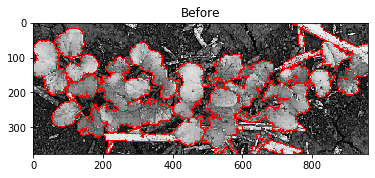

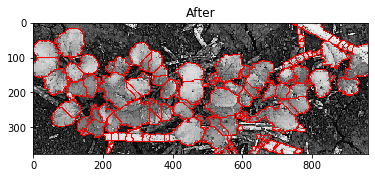

Processed Image: IMG_4490.JPG Class: 10


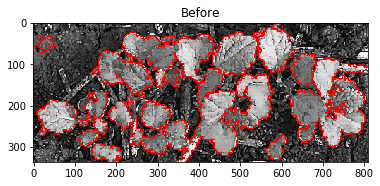

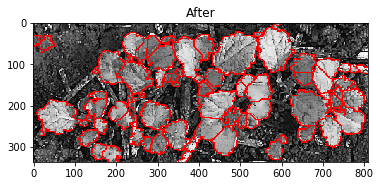

Processed Image: IMG_4490_1.JPG Class: 10


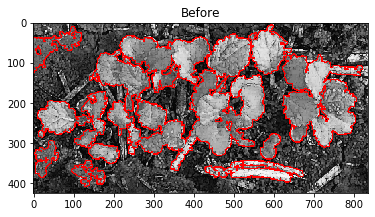

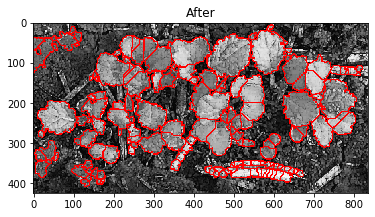

Processed Image: IMG_4490_1_2.JPG Class: 10


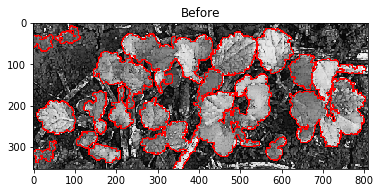

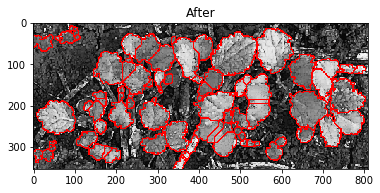

Processed Image: IMG_4490_1_2_3.JPG Class: 10


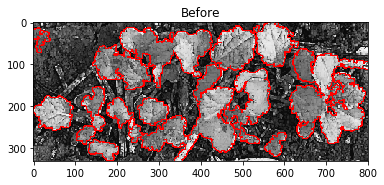

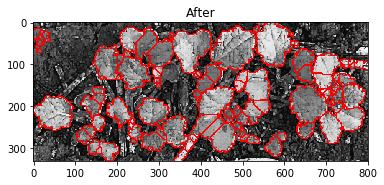

Processed Image: IMG_4490_1_2_3_4.JPG Class: 10


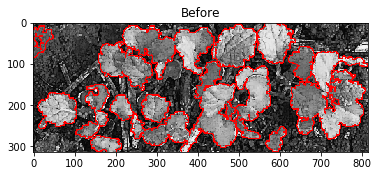

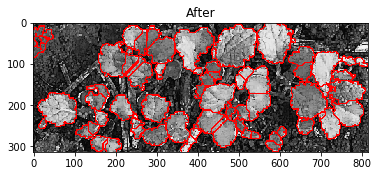

Processed Image: IMG_4490_1_2_3_4_5.JPG Class: 10


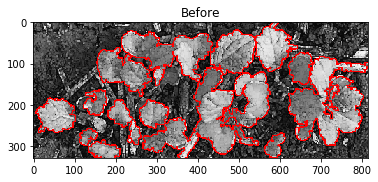

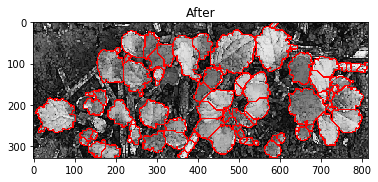

Processed Image: IMG_4498.JPG Class: 10


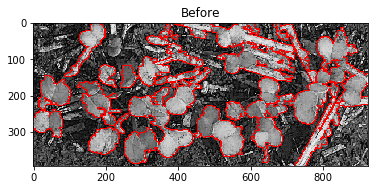

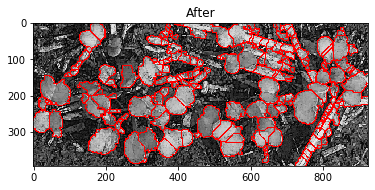

Processed Image: IMG_4498_1.JPG Class: 10


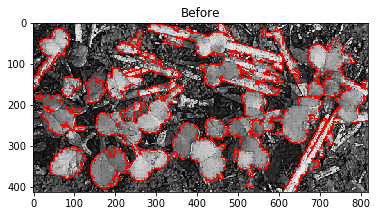

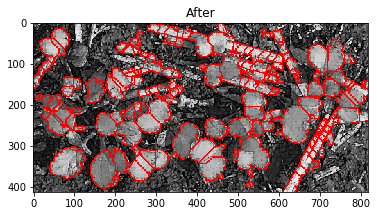

Processed Image: IMG_4498_1_2.JPG Class: 10


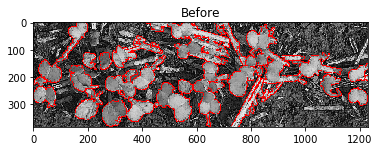

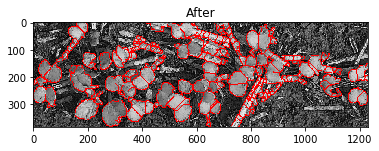

Processed Image: IMG_4498_1_2_3.JPG Class: 10


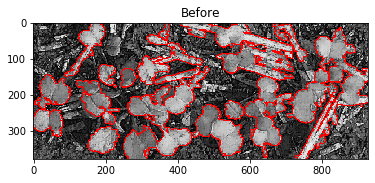

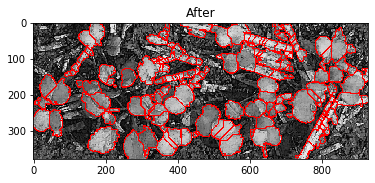

Processed Image: IMG_4498_1_2_3_4.JPG Class: 10


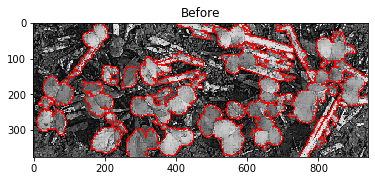

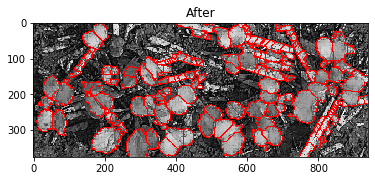

Processed Image: G0316505.JPG Class: 11


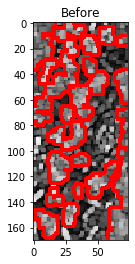

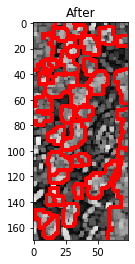

Processed Image: G0316506.JPG Class: 11


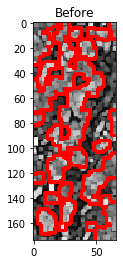

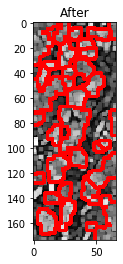

Processed Image: G0316508.JPG Class: 11


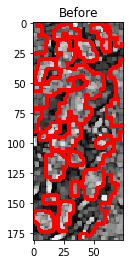

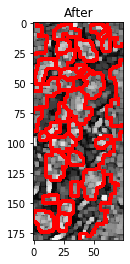

Processed Image: G0316509.JPG Class: 11


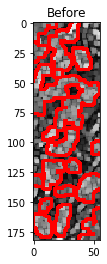

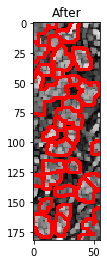

Processed Image: G0316510.JPG Class: 11


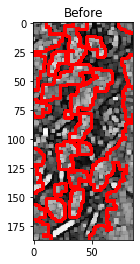

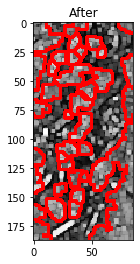

Processed Image: G0316511.JPG Class: 11


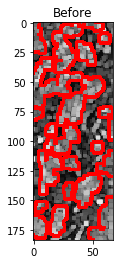

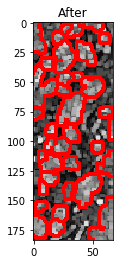

Processed Image: G0316513.JPG Class: 11


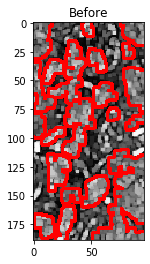

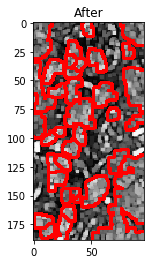

Processed Image: G0316516.JPG Class: 11


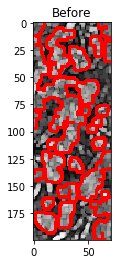

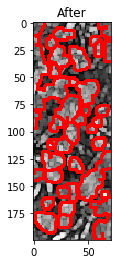

Processed Image: G0316518.JPG Class: 11


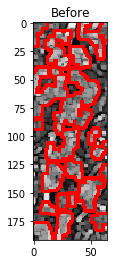

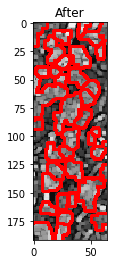

Processed Image: G0316520.JPG Class: 11


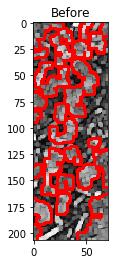

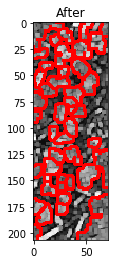

Processed Image: G0316522.JPG Class: 11


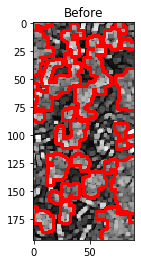

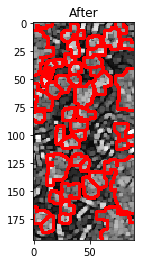

Processed Image: IMG_4487.JPG Class: 14


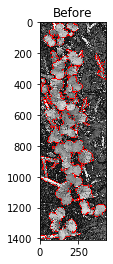

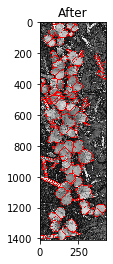

Processed Image: G0066316.JPG Class: 15


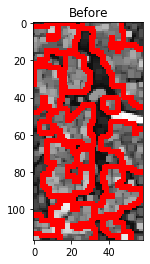

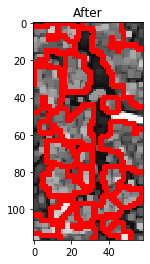

Processed Image: G0096338.JPG Class: 2


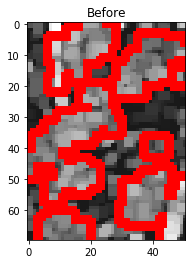

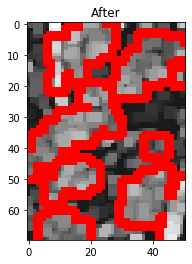

Processed Image: G0096339.JPG Class: 2


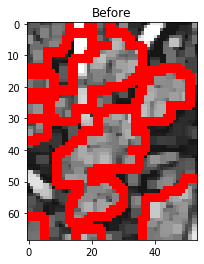

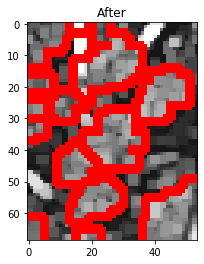

Processed Image: G0096341.JPG Class: 2


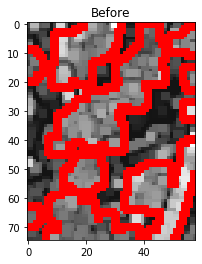

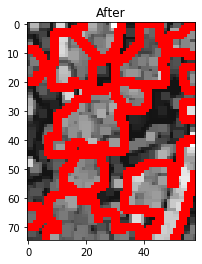

Processed Image: G0096342.JPG Class: 2


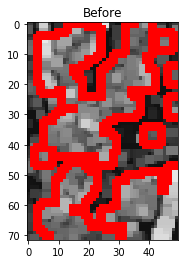

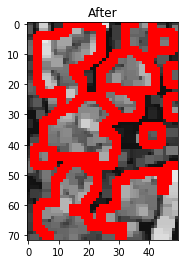

Processed Image: G0096343.JPG Class: 2


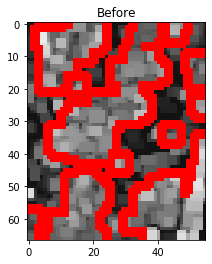

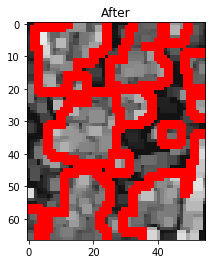

Processed Image: G0096344.JPG Class: 2


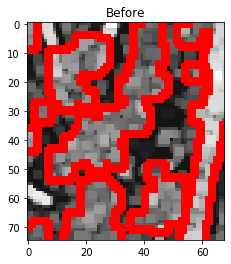

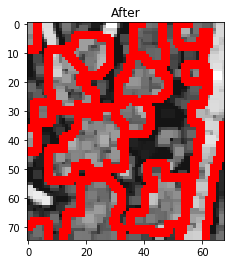

Processed Image: G0096346.JPG Class: 2


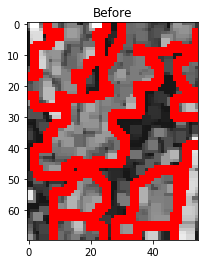

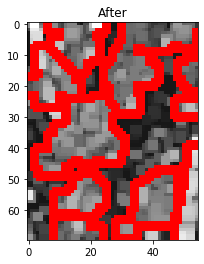

Processed Image: G0116353.JPG Class: 2


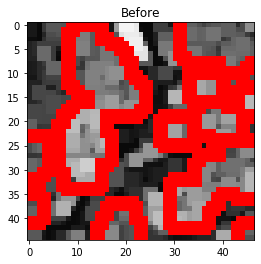

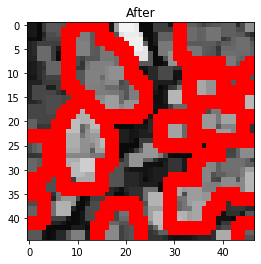

Processed Image: G0116354.JPG Class: 2


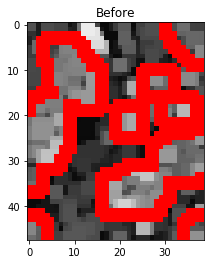

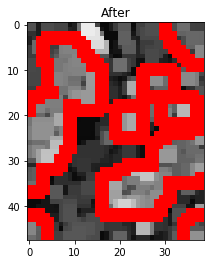

Processed Image: G0116355.JPG Class: 2


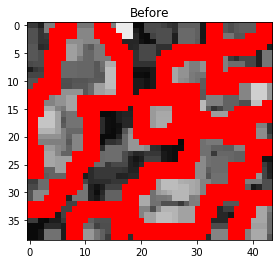

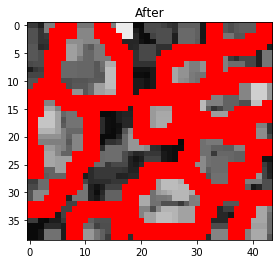

Processed Image: G0116356.JPG Class: 2


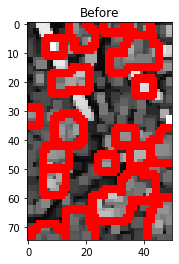

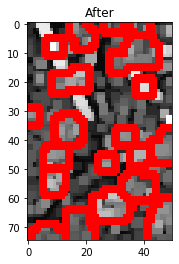

Processed Image: G0116357.JPG Class: 2


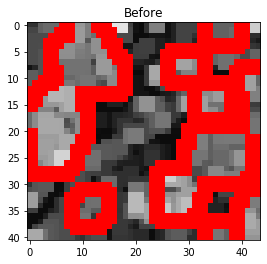

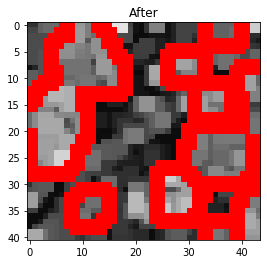

Processed Image: G0136363.JPG Class: 2


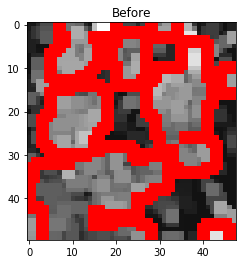

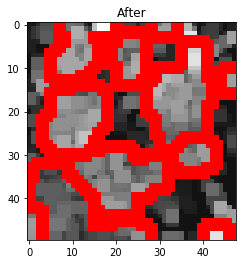

Processed Image: G0136364.JPG Class: 2


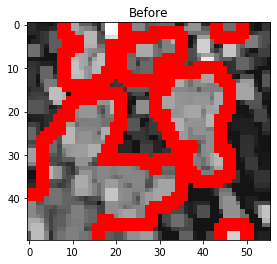

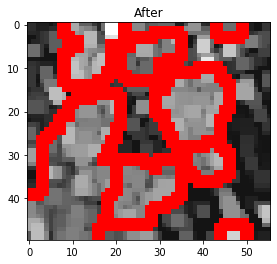

Processed Image: G0136365.JPG Class: 2


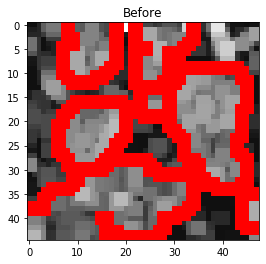

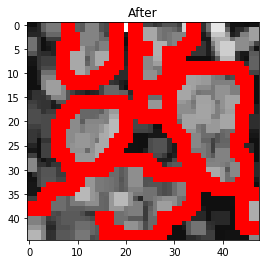

Processed Image: G0136366.JPG Class: 2


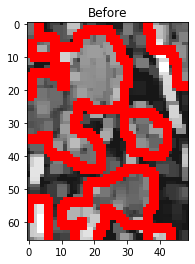

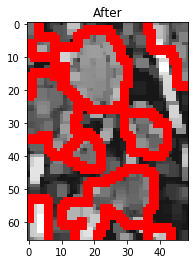

Processed Image: G0136367.JPG Class: 2


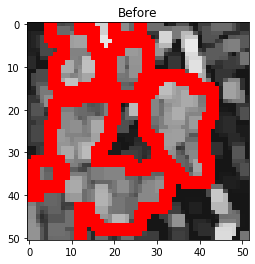

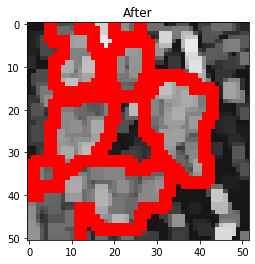

Processed Image: G0136368.JPG Class: 2


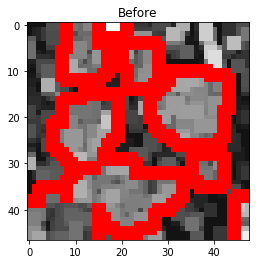

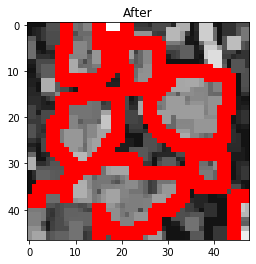

Processed Image: G0136369.JPG Class: 2


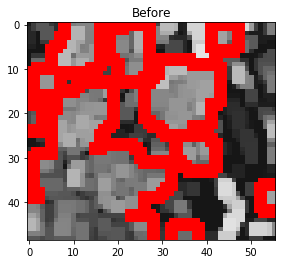

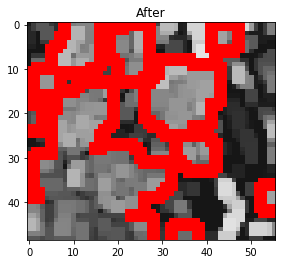

Processed Image: G0136370.JPG Class: 2


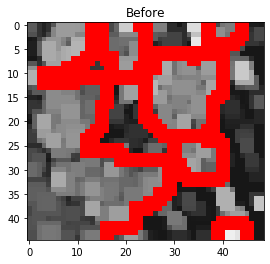

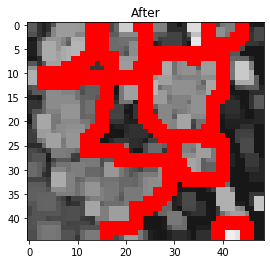

Processed Image: G0166380.JPG Class: 2


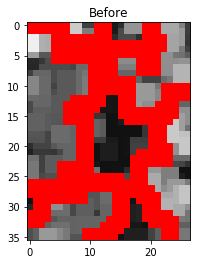

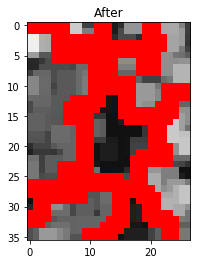

Processed Image: G0166381.JPG Class: 2


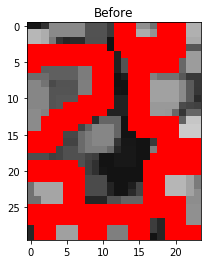

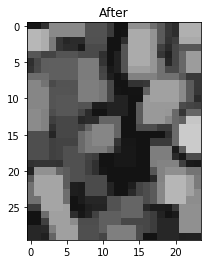

Processed Image: G0166382.JPG Class: 2


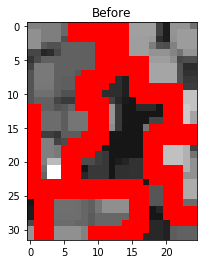

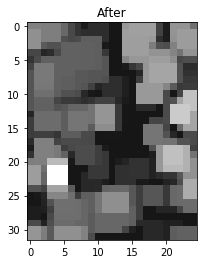

Processed Image: G0166383.JPG Class: 2


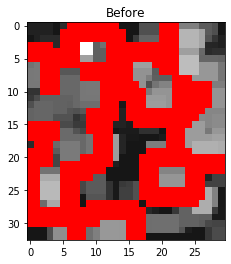

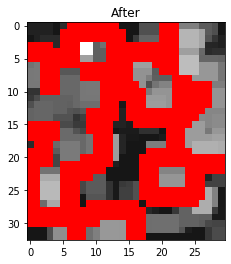

Processed Image: G0166384.JPG Class: 2


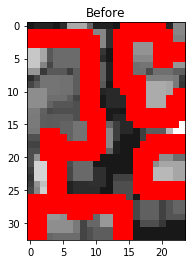

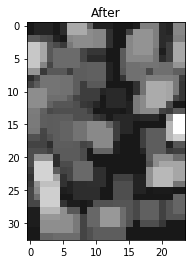

Processed Image: G0196395.JPG Class: 2


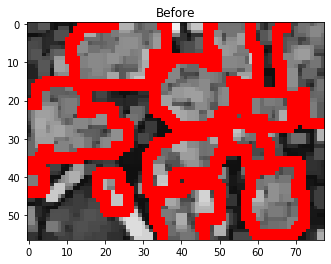

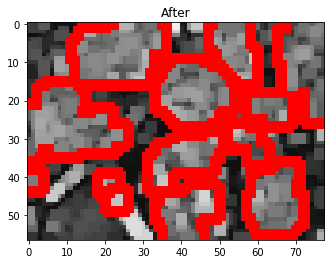

Processed Image: G0196396.JPG Class: 2


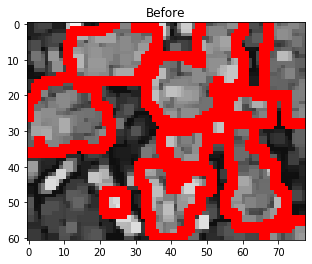

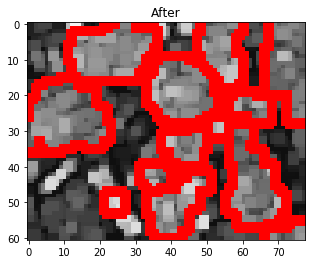

Processed Image: G0196397.JPG Class: 2


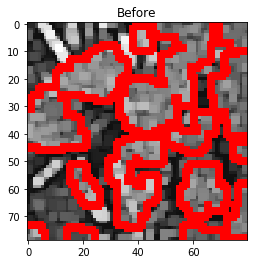

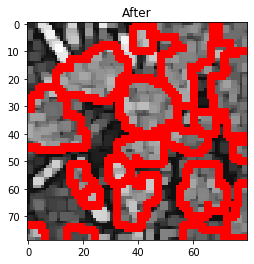

Processed Image: G0196398.JPG Class: 2


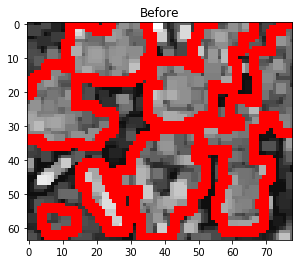

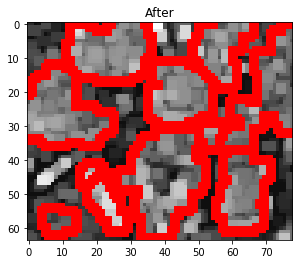

Processed Image: G0206400.JPG Class: 2


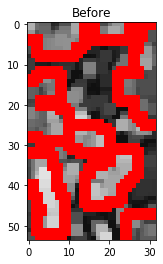

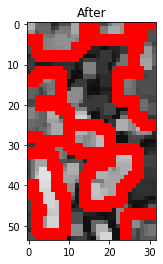

Processed Image: G0206401.JPG Class: 2


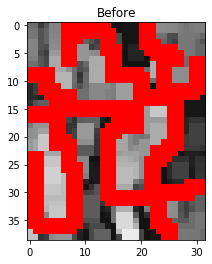

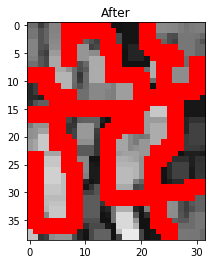

Processed Image: G0206402.JPG Class: 2


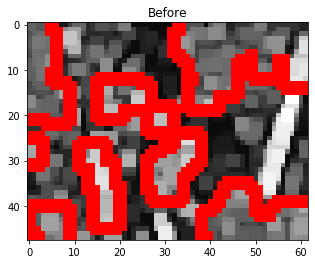

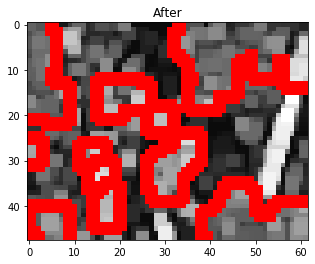

Processed Image: G0246435.JPG Class: 2


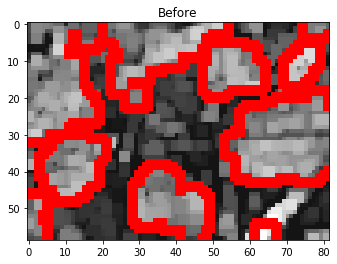

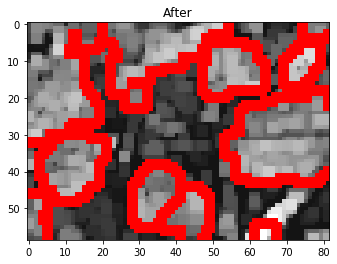

Processed Image: G0246436.JPG Class: 2


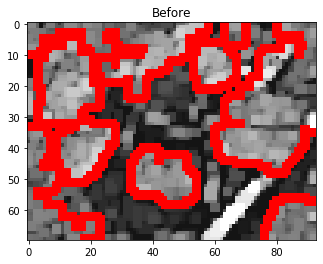

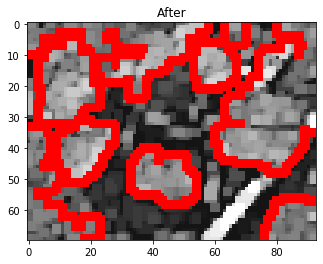

Processed Image: G0246437.JPG Class: 2


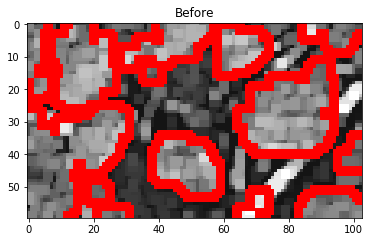

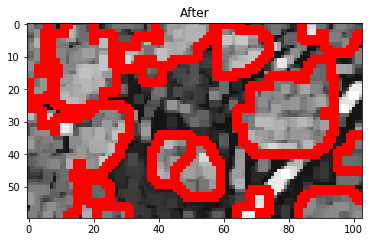

Processed Image: G0246438.JPG Class: 2


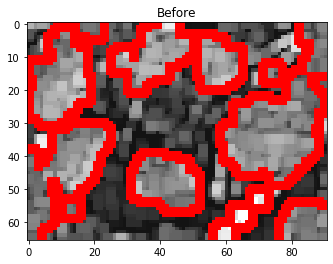

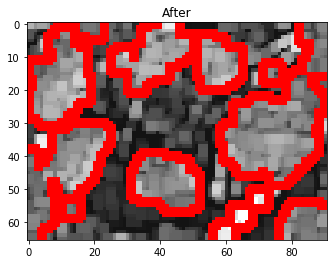

Processed Image: G0246439.JPG Class: 2


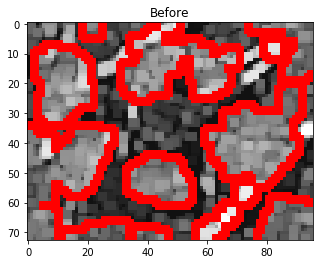

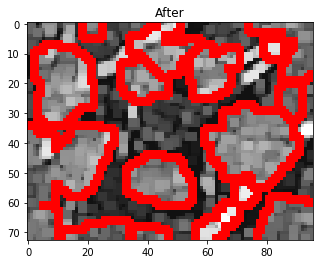

Processed Image: G0246440.JPG Class: 2


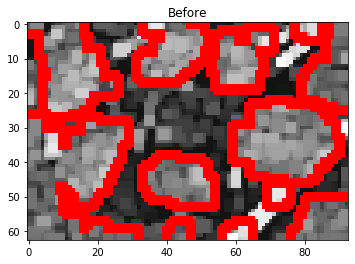

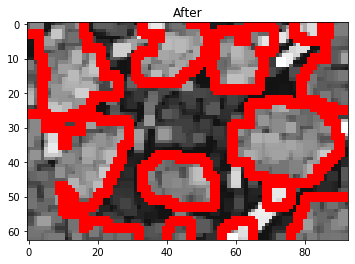

Processed Image: G0246442.JPG Class: 2


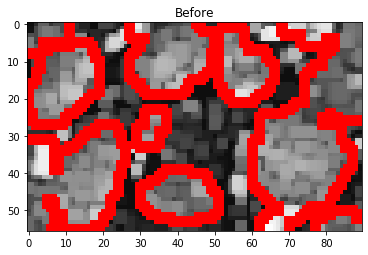

KeyboardInterrupt: 

In [26]:
region_features=[]
classes=[]
test_region = []
train_region = []
train_classes_region = []
test_classes_region =[]

for root, dirs, files in os.walk('Data/Combined_Data'):
    for filename in files:
        cropped_image =  io.imread(root+'/'+filename)
        image_class = root.replace("\\","/").split('/')[2]
        print("Processed Image: "+str(filename)+" Class: "+str(image_class))
        apply_watershed(cropped_image)
